# **Fair and Equitable AI in Recommendation Systems**
## **Kyanon Digital**
### **Abraham Ighalo - Data Engineer**
#### **April 2025**



### 1. Introduction
**Recommendation systems** play a central role in shaping user experiences across digital platforms, including e-commerce, media streaming, social networks, and hiring platforms. As these systems increasingly influence access to information, opportunities, and resources, it becomes critical to ensure that they operate in a fair and equitable manner.

**Fairness in Recommendation Systems**
**Fairness** in recommendation systems refers to the absence of unjust or systematic bias in the way content, opportunities, or resources are suggested to users.

**Equity in Recommendation Systems**
**Equity** in recommendation systems involves proactively addressing structural disadvantages and promoting inclusivity through algorithmic design and policy.


# **Mount Drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Verify the libraries in requirements.txt File**

In [ ]:
!pip install -r /content/drive/MyDrive/requirements.txt --force-reinstall


In [97]:
'''
 Use when you get blinker error, works on T4 GPU
!pip install --upgrade --force-reinstall blinker



# install all dependencies
!pip install mlflow scikit-surprise tabulate pyngrok
'''


'\n Use when you get blinker error, works on T4 GPU\n!pip install --upgrade --force-reinstall blinker\n\n\n\n# install all dependencies\n!pip install mlflow scikit-surprise tabulate pyngrok \n'

# MLFlow Settings

In [ ]:
# Set Up MLflow Tracking
import mlflow
import subprocess
from pyngrok import ngrok, conf
import getpass

MLFLOW_TRACKING_URI = "sqlite:///mlflow.db"
subprocess.Popen(["mlflow", "ui", "--backend-store-uri",MLFLOW_TRACKING_URI])

mlflow.set_tracking_uri(MLFLOW_TRACKING_URI)
mlflow.set_experiment("Recommender_System")


In [2]:
#3.Expose MLflow UI using ngrok
from pyngrok import ngrok

In [3]:
from pyngrok import ngrok, conf
import getpass

# Authenticate ngrok
print("Enter your authtoken, which can be copied from https://dashboard.ngrok.com/get-started/your-authtoken")
conf.get_default().auth_token = getpass.getpass()

port = 5000
public_url = ngrok.connect(port).public_url
print(f' * ngrok tunnel \"{public_url}\" -> \"http://127.0.0.1:{port}\"')


Enter your authtoken, which can be copied from https://dashboard.ngrok.com/get-started/your-authtoken
··········
 * ngrok tunnel "https://5980e25406ca.ngrok-free.app" -> "http://127.0.0.1:5000"


In [4]:
'''
if surprise doesn't work. Will restart the session
!pip install numpy==1.23.5 --force-reinstall --no-cache-dir
'''

# Installing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# **Exploratory Data Analysis**

Exploratory Data Analysis (EDA) is a method of analyzing datasets to understand their main characteristics, often using visualization and statistical techniques to summarize data, identify patterns, and reveal relationships. It's an iterative process that helps in gaining initial insights and formulating hypotheses for further analysis. "

**Step 1**: Understand the Problem and Data
**Goal**: Build a recommendation system with filtering criteria that avoids bias from demographic factors, sex, orientation, and popularity

**Data Types**:
* **Numerical**: discounted_price, actual_price, discount_percentage, rating, rating_count
* **Categorical**: product_id, category, user_id, review_id
* **Text**: product_name, about_product, user_name, review_title, review_content
* **URL**: img_link, product_link

In [5]:

import kagglehub

# Download latest version
path = kagglehub.dataset_download("karkavelrajaj/amazon-sales-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/amazon-sales-dataset


### **Step 2: Import and Inspect Data**
* Load data carefully
* Check data size, missing values, data types
* Identify errors or inconsistencies

In [6]:
#save dataset into a dataframe
dataset = path +"/amazon.csv"
df = pd.read_csv(dataset)

df.head(3)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...


In [7]:
df.shape

(1465, 16)

In [8]:
from tabulate import tabulate

select_top_rows = df.iloc[0:5]
#print(tabulate(select_top_rows, headers = 'keys', tablefmt = 'grid'))
print(select_top_rows)
#review datatypes
print(f"\n\n\nAmazon Dataset Datatypes:  \n\n{df.dtypes}")


print( f"\n\nHere we have the technical view of the data: \n")
df.info()

   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accessories&Peripherals|...             ₹199   
3  Computers&Accessories|Accessories&Peripherals|...             ₹329   
4  Computers&Accessories|Accessories&Peripherals|...             ₹154   

  actual_price discount_percentage rating rating_count  \
0       ₹1,099                 64%    4.2       24,269   
1         ₹349                 43%  

In [9]:
#Descriptive analysis
description = df.describe(include = 'object')
#print(tabulate(description, headers = 'keys', tablefmt = 'grid'))
print(description)


        product_id                                       product_name  \
count         1465                                               1465   
unique        1351                                               1337   
top     B08HDJ86NZ  Fire-Boltt Ninja Call Pro Plus 1.83" Smart Wat...   
freq             3                                                  5   

                                                 category discounted_price  \
count                                                1465             1465   
unique                                                211              550   
top     Computers&Accessories|Accessories&Peripherals|...             ₹199   
freq                                                  233               53   

       actual_price discount_percentage rating rating_count  \
count          1465                1465   1465         1463   
unique          449                  92     28         1143   
top            ₹999                 50%    4.1        

From the descriptive analysis we know the following :
* There are a total of 1465 products in this dataset and by
* 1194 unique users( note a user can review multiple items),
* we have 211 unique product categories
* 550 discounted products
The most rated product is the Fire-Boltt Ninja Call Pro Plus 1.83"


https://www.amazon.com/Wayona-Braided-Lightning-Charging-Compatible/dp/B07JW9H4J1

### **Step 3: Handle Missing Data**
* Understand missing data patterns (MCAR, MAR, MNAR)
* Choose strategy: removal or imputation
* Apply suitable imputation methods

In [10]:
#Check for duplictes and misisng values
print(f"Duplicates: {df.duplicated().sum()} \n")
print(f"Missing Values: \n{df.isnull().sum()}")


Duplicates: 0 

Missing Values: 
product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


### **Step 4: Explore Data Characteristics**
* Change data types to support calculations
* Calculate summary statistics for numerical variables


### **Step 5: Perform Data Transformation**

* Prepare data for accurate analysis and modeling


In [11]:
'''
Removed currency symbols (₹, ,) and converted data types for:
- rating_count → integer (removed commas, filled NaNs with 0)
- discounted_price → float (removed ₹ and commas)
- actual_price → float (removed ₹ and spaces)
'''


df['rating_count'] = df['rating_count'].str.replace(",", "").fillna(0).astype(int)
df["discounted_price"] = df["discounted_price"].str.replace(r"[₹,]","", regex = True).astype(float)
df['discount_percentage'] = df['discount_percentage'].str.replace("%","").astype(int)/100
df["actual_price"] = df["actual_price"].str.replace(r"[₹ ,]","",regex = True).astype(float)


# Verify change
top_5 = df.iloc[0:5]
bottom_5 = df.iloc[-5:]


# print(tabulate(top_5 , headers = 'keys', tablefmt = 'grid'))
# print(tabulate(bottom_5, headers = 'keys', tablefmt = 'grid'))

print(top_5)
print(bottom_5)

   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category  discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             399.0   
1  Computers&Accessories|Accessories&Peripherals|...             199.0   
2  Computers&Accessories|Accessories&Peripherals|...             199.0   
3  Computers&Accessories|Accessories&Peripherals|...             329.0   
4  Computers&Accessories|Accessories&Peripherals|...             154.0   

   actual_price  discount_percentage rating  rating_count  \
0        1099.0                 0.64    4.2         24269   
1         349.0         

In [12]:
'''
After fixing the data types,
check for inflated discounts where discounted_price > actual_price.
'''
df[df["discounted_price"] > df['actual_price']]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link


In [13]:
'''
summary of the rating column
'''
df['rating'].describe().T

,rating
count,1465
unique,28
top,4.1
freq,244


In [14]:
'''
minimum and max ratings
investigate the column
'''
print (f"The minimum rating is: {df['rating'].min()}")
print (f"The maximum rating is: {df['rating'].max()}")

search_character = df.query("rating == '|'")
#print(tabulate(search_character, headers = 'keys', tablefmt = 'grid'))

print(search_character)

The minimum rating is: 2
The maximum rating is: |
      product_id                                       product_name  \
1279  B08L12N5H1  Eureka Forbes car Vac 100 Watts Powerful Sucti...   

                                               category  discounted_price  \
1279  Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...            2099.0   

      actual_price  discount_percentage rating  rating_count  \
1279        2499.0                 0.16      |           992   

                                          about_product  \
1279  No Installation is provided for this product|1...   

                                                user_id  \
1279  AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...   

                                              user_name  \
1279  Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...   

                                              review_id  \
1279  R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...   

                                           revi

In [15]:
'''
Replaced the | character with the rating I found online
Source : https://www.amazon.in/Eureka-Forbes-Vacuum-Cleaner-Washable/dp/B08L12N5H1

'''
#Replace pipe with 1 and cast df to float
df['rating']=df['rating'].str.replace("|","3.9").astype(float)
df['rating'].unique()

array([4.2, 4. , 3.9, 4.1, 4.3, 4.4, 4.5, 3.7, 3.3, 3.6, 3.4, 3.8, 3.5,
       4.6, 3.2, 5. , 4.7, 3. , 2.8, 3.1, 4.8, 2.3, 2. , 2.6, 2.9])

In [16]:
#Verify datatypes
Ratings = df[['user_id','product_id','product_name','rating','discounted_price',	'actual_price', 'discount_percentage',	'rating_count']]
Ratings.dtypes

,0
user_id,object
product_id,object
product_name,object
rating,float64
discounted_price,float64
actual_price,float64
discount_percentage,float64
rating_count,int64


In [17]:
print ("Total Numerical Data")
print ("*"*50)
print (f"Total no of ratings:  {Ratings.shape[0]}")
print (f"Total No of Users: {len(np.unique(Ratings.user_id))}")
print (f"Total No of Products: {len(np.unique(Ratings.discounted_price))}")

print(f"\nThere area total of {Ratings.shape[0]} user ratings in our dataset from {len(np.unique(Ratings.user_id))} unique users with {len(np.unique(Ratings.discounted_price))} products")


Total Numerical Data
**************************************************
Total no of ratings:  1465
Total No of Users: 1194
Total No of Products: 550

There area total of 1465 user ratings in our dataset from 1194 unique users with 550 products


Save CLeaned DataSets



### **Step 6:** Visualize Data Relationships

* Categorical: frequency tables, bar plots, pie charts
* Numerical: histograms, box plots, violin plots
* Relationships: scatter plots, correlation matrices, statistical tests

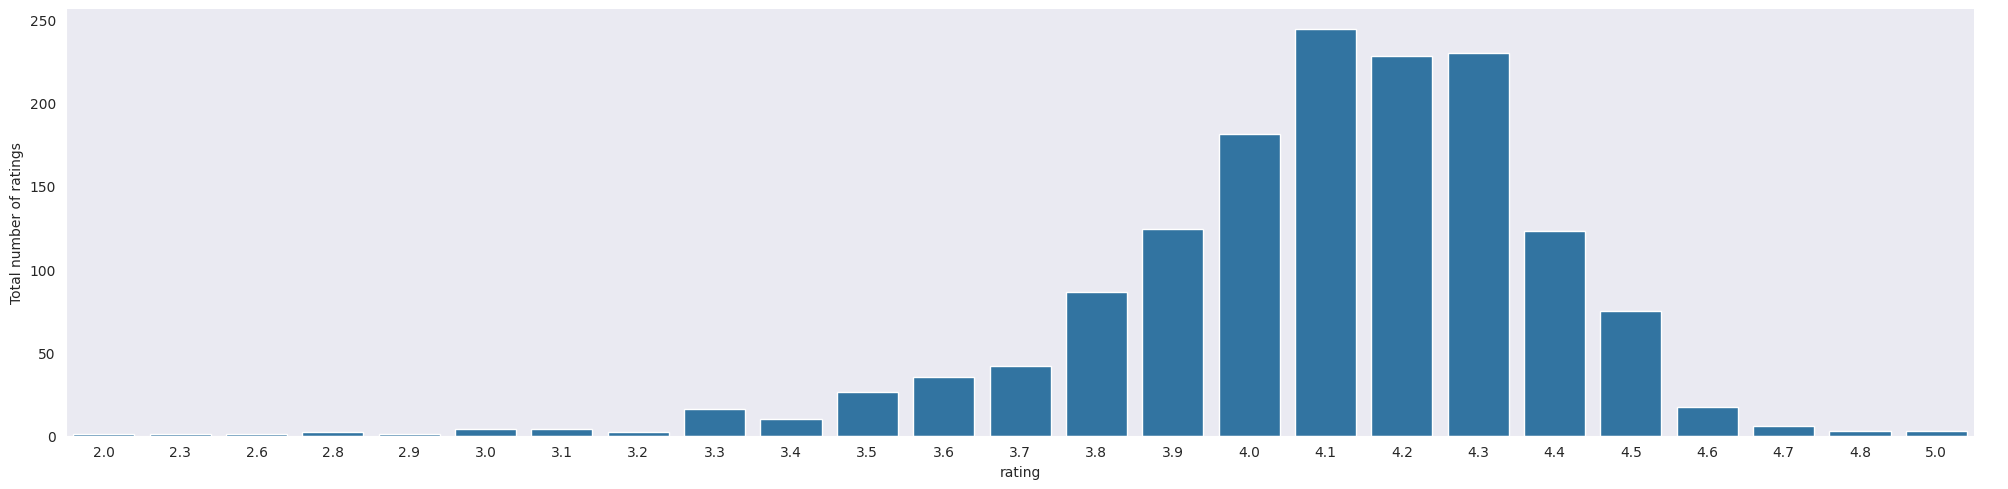

In [18]:

#most of the ratings are around the mid level from 3.9 -4.4, its generally lesser at the ends
with sns.axes_style("dark"):
  g = sns.catplot(x = "rating", data = Ratings, aspect = 4.0, kind = "count")
  g.set_ylabels("Total number of ratings")

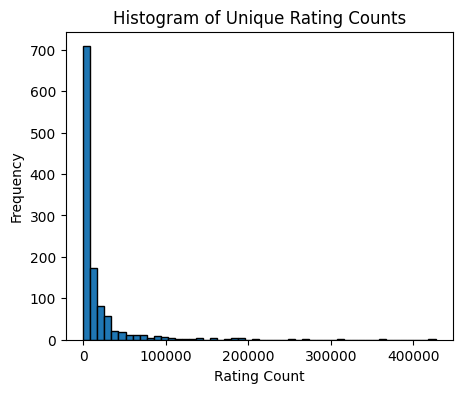

In [19]:

plt.figure(figsize=(5, 4))
plt.rcParams['patch.force_edgecolor'] = True

# Get unique rating_count values
unique_ratings = Ratings['rating_count'].unique()

# Plot histogram of unique values
plt.hist(unique_ratings, bins=50)
plt.xlabel("Rating Count")
plt.ylabel("Frequency")
plt.title("Histogram of Unique Rating Counts")
plt.show()


# **Recommendations System - Machine learning Approaches**

### **1. Popularity-Based System**
**Approach:** Recommend the most popular items based on rating_count.


**Evaluation:** Popularity-based systems are often evaluated based on business metrics like sales uplift or user engagement, as they don't personalize recommendations.

* Hit rate  $(\frac{hits}{Users})$

* Recall    $(\frac{Number of Relevant items in Top-k}{Total Number of Relevant Items})$

* Precison   $(\frac{Number of Relevant items in Top-K}{Total Number of items in
 Top-K Recommended})$

In [20]:
import pandas as pd

# Sample DataFrame (assuming 'Ratings' is your dataset)
df_ratings = Ratings.copy()

# Ensure numeric types
df_ratings['rating'] = pd.to_numeric(df['rating'])
df_ratings['rating_count'] = pd.to_numeric(df['rating_count'])
df_ratings['discount_percentage'] = pd.to_numeric(df['discount_percentage'])

# Define a weight for discount influence
discount_weight = 0.1

# Compute Popularity Score
df_ratings['popularity_score'] = (df_ratings['rating'] * df_ratings['rating_count']) + (df_ratings['discount_percentage'] * discount_weight)

# Sort items based on popularity
popular_items = df_ratings.groupby(['product_name','rating'])['popularity_score'].sum().reset_index()
popular_items = popular_items.sort_values(by='popularity_score', ascending=False)


top_n = 10
print(f"Top {top_n} Popular Products:")
#print(tabulate(popular_items.head(top_n),headers = 'keys',tablefmt = 'grid' ))

print(popular_items.head(top_n))
popular_items.head(top_n).to_csv("popular_products.csv", index=False)

Top 10 Popular Products:
                                           product_name  rating  \
101   AmazonBasics Flexible Premium HDMI Cable (Blac...     4.4   
75    Amazon Basics High-Speed HDMI Cable, 6 Feet (2...     4.4   
76    Amazon Basics High-Speed HDMI Cable, 6 Feet - ...     4.4   
512   JBL C100SI Wired In Ear Headphones with Mic, J...     4.1   
1258  boAt Bassheads 100 in Ear Wired Earphones with...     4.1   
1257  boAt Bassheads 100 in Ear Wired Earphones with...     4.1   
1254  boAt BassHeads 100 in-Ear Wired Headphones wit...     4.1   
901   Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Sto...     4.1   
899   Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...     4.1   
902   Redmi 9A Sport (Coral Green, 3GB RAM, 32GB Sto...     4.1   

      popularity_score  
101        3757358.138  
75         1878681.278  
76         1878681.235  
512        1579225.780  
1258       1491223.365  
1257       1491223.362  
1254       1491215.163  
901        1286727.624  
899        1


##### Hit_rate, Precison, Recall for popularity based



In [21]:
def hit_rate(predicted_top_products, actual_top_products, k):
  predicted_top_products = set(predicted_top_products[:k])
  actual_top_products = set(actual_top_products[:k])
  Model_check = len(predicted_top_products & actual_top_products)
  Hit_rate = Model_check/k
  return Hit_rate



def recall(predicted_top_products, actual_top_products, k):
    predicted_top_products = set(predicted_top_products[:k])
    actual_top_products = set(actual_top_products[:k])  # Adjusted
    relevant = len(predicted_top_products & actual_top_products)
    recall = relevant / len(actual_top_products) if len(actual_top_products) > 0 else 0
    return recall



def precision(predicted_top_products, actual_top_products, k):
  predicted_top_products = set(predicted_top_products[:k])
  actual_top_products = set(actual_top_products[:k])
  relevant_items = len(predicted_top_products & actual_top_products)
  precision =  relevant_items/len(predicted_top_products)
  return precision

def f1_score(precision, recall):
    if precision + recall == 0:
        return 0
    return 2 * (precision * recall) / (precision + recall)

predicted_top_products = df_ratings.sort_values(by='popularity_score', ascending=False)['product_id'].tolist()
actual_top_products = df.sort_values(by='rating_count', ascending=False)['product_id'].tolist()


recall = recall(predicted_top_products, actual_top_products, k=20)
precision = precision(predicted_top_products, actual_top_products, k=10)
hit_rate_10 = hit_rate(predicted_top_products,actual_top_products, k=10)
f1 = f1_score(precision, recall)


print(f"Hit Rate (Top 10): {hit_rate_10:.2f}")
print(f"Precision_Rate: {precision:.2f}")
print(f"Recall_Rate: {recall:.4f}")



with mlflow.start_run(run_name = "Hit_rate_popularty_RecSys"):
  mlflow.log_metric("Hit_rate",hit_rate_10)
  mlflow.log_metric("Precision", round(precision,2))
  mlflow.log_metric("F1", round(f1,2))
  mlflow.log_metric("Recall",round(recall,4))
  mlflow.log_param("dataset_size", len(df))
  mlflow.set_tag("Top n", "Metric for popularity model")
  mlflow.log_artifact("popular_products.csv")



Hit Rate (Top 10): 0.90
Precision_Rate: 1.00
Recall_Rate: 0.9444


### **2. Content-Based System**
**Approach:** Use item features like category and about_product to recommend similar items.

**Evaluation:** Use precision, recall, and F1-score by comparing recommended items to a test set of user interactions.

---
**Evaluation Metrics**
----------
**Precision**: The fraction of recommended items that are relevant.  

$
\text{Precision} = \frac{\text{Number of Relevant Items Recommended}}{\text{Total Number of Items Recommended}}
$



**Recall**: The fraction of relevant items that are recommended.  

$
\text{Recall} = \frac{\text{Number of Relevant Items Recommended}}{\text{Total Number of Relevant Items}}
$


**F1-Score**: The harmonic mean of precision and recall.  

$
\text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1465 non-null   float64
 7   rating_count         1465 non-null   int64  
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

Sepatated the user_id list to contain only one id per row

In [23]:
Ratings_cn = df[['user_id','product_id','product_name','rating','discounted_price',	'actual_price', 'discount_percentage',	'rating_count']]

Ratings_cn.loc[:,'user_id'] = Ratings_cn['user_id'].str.split(',')

ratings_df = Ratings_cn.explode('user_id').reset_index(drop=True)

ratings_df.head()

,user_id,product_id,product_name,rating,discounted_price,actual_price,discount_percentage,rating_count
0,AG3D6O4STAQKAY2UVGEUV46KN35Q,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,4.2,399.0,1099.0,0.64,24269
1,AHMY5CWJMMK5BJRBBSNLYT3ONILA,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,4.2,399.0,1099.0,0.64,24269
2,AHCTC6ULH4XB6YHDY6PCH2R772LQ,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,4.2,399.0,1099.0,0.64,24269
3,AGYHHIERNXKA6P5T7CZLXKVPT7IQ,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,4.2,399.0,1099.0,0.64,24269
4,AG4OGOFWXJZTQ2HKYIOCOY3KXF2Q,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,4.2,399.0,1099.0,0.64,24269


### **Content Based Filtering**





In [24]:

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import mlflow
from itertools import combinations

# Content Based Recommendation System
# Assuming df is your input DataFrame
ratings_df = df[['user_id', 'product_id', 'product_name', 'rating', 'discounted_price', 'category',
                 'about_product', 'actual_price', 'discount_percentage', 'rating_count']].copy()

# Handle NaN values and ensure string type
ratings_df['category'] = ratings_df['category'].fillna('').astype(str)
ratings_df['about_product'] = ratings_df['about_product'].fillna('').astype(str)
ratings_df['combined_features'] = ratings_df['category'] + ' ' + ratings_df['about_product']

# Vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(ratings_df['combined_features'])
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

def get_recommendations(product_index, cosine_sim=cosine_sim, n=10):
    try:
        sim_scores = list(enumerate(cosine_sim[product_index]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        sim_scores = sim_scores[1:n+1]  # Exclude the product itself
        product_indices = [i[0] for i in sim_scores]
        return ratings_df['product_name'].iloc[product_indices].tolist()
    except IndexError:
        return []

# ========= Evaluation Functions for Content-Based Recommendation System =========


def precision_at_k(recommended, relevant, k=10):
    """Calculate precision@k"""
    if not recommended or k <= 0:
        return 0
    recommended_at_k = recommended[:k]
    relevant_set = set(relevant)
    hits = len(set(recommended_at_k) & relevant_set)
    return hits / k



def recall_at_k(recommended, relevant, k=10):
    """Calculate recall@k"""
    if not recommended or not relevant or k <= 0:
        return 0
    relevant_set = set(relevant)
    hits = len(set(recommended[:k]) & relevant_set)
    return hits / len(relevant_set)



def f1_at_k(recommended, relevant, k=10):
    """Calculate F1-score@k"""
    precision = precision_at_k(recommended, relevant, k)
    recall = recall_at_k(recommended, relevant, k)
    if precision + recall == 0:
        return 0
    return 2 * (precision * recall) / (precision + recall)



def average_precision(recommended, relevant):
    relevant_set = set(relevant)  # Unique relevant items
    hits = 0
    sum_precision = 0
    for i, item in enumerate(recommended, 1):
        if item in relevant_set and hits < len(relevant_set):  # Cap at unique relevant items
            hits += 1
            sum_precision += hits / i
    return sum_precision / len(relevant_set) if len(relevant_set) > 0 else 0



def dcg_at_k(recommended, relevant, k):
    """Calculate Discounted Cumulative Gain"""
    relevant_set = set(relevant)
    dcg = 0
    for i, item in enumerate(recommended[:k], 1):
        if item in relevant_set:
            dcg += 1 / np.log2(i + 1)
    return dcg




def ndcg_at_k(recommended, relevant, k):
    dcg = dcg_at_k(recommended, relevant, k)
    sorted_relevant = sorted(relevant, key=lambda x: recommended.index(x) if x in recommended else float('inf'))

    ideal_dcg = dcg_at_k(sorted_relevant[:k], relevant, k)

    return dcg / ideal_dcg if ideal_dcg > 0 else 0




def reciprocal_rank(recommended, relevant):
    for i, item in enumerate(recommended, 1):
        if item in relevant:
            return 1 / i
    return 0



def average_similarity(query_index, recommended_products, cosine_sim):
    query_similarities = cosine_sim[query_index]
    recommended_indices = ratings_df[ratings_df['product_name'].isin(recommended_products)].index
    similarities = [query_similarities[idx] for idx in recommended_indices if idx < len(query_similarities)]
    return sum(similarities) / len(similarities) if similarities else 0



def diversity(recommended_products, cosine_sim, Ratings_cn):
    """Calculate intra-list diversity"""
    indices = ratings_df[ratings_df['product_name'].isin(recommended_products)].index.tolist()

    if len(indices) < 2:
        return 0  # Diversity not defined for <2 items
    sim_sum = 0
    count = 0
    for i, j in combinations(indices, 2):
        if i < len(cosine_sim) and j < len(cosine_sim):
            sim_sum += cosine_sim[i][j]
            count += 1
    avg_sim = sim_sum / count if count > 0 else 0
    return 1 - avg_sim  # Higher value = more diverse recommendations



# Evaluation and MLflow Run
sample_product_index = 1
sample_product_name = ratings_df['product_name'].iloc[sample_product_index]
recommended_products = get_recommendations(sample_product_index, n=10)

user_id = ratings_df.iloc[sample_product_index]['user_id']
relevant_items = ratings_df[ratings_df['user_id'] == user_id]['product_name'].tolist()

# Compute all evaluation metrics
k = 10
precision = precision_at_k(recommended_products, relevant_items, k)
recall = recall_at_k(recommended_products, relevant_items, k)
f1_score = f1_at_k(recommended_products, relevant_items, k)
map_score = average_precision(recommended_products, relevant_items)
ndcg_score = ndcg_at_k(recommended_products, relevant_items, k)
mrr_score = reciprocal_rank(recommended_products, relevant_items)
avg_sim = average_similarity(sample_product_index, recommended_products, cosine_sim)
div_score = diversity(recommended_products, cosine_sim,Ratings_cn)

# ============================ MLflow run ==================================
with mlflow.start_run(run_name="Content_Based_RecSys"):
    # Log parameters
    mlflow.log_param("dataset_size", len(df))
    mlflow.log_param("top_n", k)

    # Log artifacts
    pd.DataFrame(cosine_sim).to_csv("cosine_similarity_matrix.csv", index=False)
    mlflow.log_artifact("cosine_similarity_matrix.csv")

    # Log  recommendation
    mlflow.log_dict({"product_name": sample_product_name, "recommendations": recommended_products}, "recommendations.json")

    # Log metrics
    mlflow.log_metric("Precision", precision)
    mlflow.log_metric("Recall", recall)
    mlflow.log_metric("F1", f1_score)
    mlflow.log_metric("map_at_10", map_score)
    mlflow.log_metric("ndcg_at_10", ndcg_score)
    mlflow.log_metric("mrr", mrr_score)
    mlflow.log_metric("average_similarity", avg_sim)
    mlflow.log_metric("diversity", div_score)


# Print results
print(f"Recommendations for {sample_product_name}:\n")
for index, value in enumerate(recommended_products, start=1):
    print(f"{index}: {value}")
print(f"\nPrecision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1_score:.4f}")
print(f"MAP: {map_score:.4f}")
print(f"NDCG: {ndcg_score:.4f}")
print(f"MRR: {mrr_score:.4f}")
print(f"Average Similarity: {avg_sim:.4f}")
print(f"Diversity: {div_score:.4f}")
print("\n")
print("Relevant items: \n")
for index,value in enumerate(relevant_items,start = 1):
  print(f"{index} {value}")

Recommendations for Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C Cable for Smartphones, Tablets, Laptops & other Type C devices, PD Technology, 480Mbps Data Sync, Quick Charge 3.0 (RCT15A, Black):

1: Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C Cable for Smartphones, Tablets, Laptops & other Type C devices, PD Technology, 480Mbps Data Sync, Quick Charge 3.0 (RCT15A, Black)
2: Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C Cable for Smartphones, Tablets, Laptops & other Type C devices, PD Technology, 480Mbps Data Sync, Quick Charge 3.0 (RCT15A, Black)
3: Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C to Type C Cable for Smartphones, Tablets, Laptops & Other Type C Devices, PD Technology, 480Mbps Data Sync (RCTT15, Black)
4: Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C to Type C Cable for Smartphones, Tablets, Laptops & Other Type C Devices, PD Technology, 480Mbps Data Sync (RCTT15, Black)
5: Ambrane U

###  **Collabirative Filtering (SVD)**

In [25]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy
from collections import defaultdict


def precision_recall_f1_at_k(predictions, k=10, threshold=3.5):
    user_est_true = defaultdict(list)

    for uid, iid, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))
    precisions = {}
    recalls = {}
    f1_scores = {}
    for uid, user_ratings in user_est_true.items():
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        top_k = user_ratings[:k]

        n_relevant = sum((true_r >= threshold) for (_, true_r) in user_ratings)
        n_recommended = sum((est >= threshold) for (est, _) in top_k)
        n_relevant_and_recommended = sum((true_r >= threshold and est >= threshold) for (est, true_r) in top_k)

        precisions[uid] = n_relevant_and_recommended / n_recommended if n_recommended else 0
        recalls[uid] = n_relevant_and_recommended / n_relevant if n_relevant else 0
        f1_scores[uid] = 2 * (precisions[uid] * recalls[uid]) / (precisions[uid] + recalls[uid]) if (precisions[uid] + recalls[uid]) else 0

    avg_precision = sum(precisions.values()) / len(precisions) if precisions else 0
    avg_recall = sum(recalls.values()) / len(recalls) if recalls else 0
    avg_f1 = sum(f1_scores.values()) / len(f1_scores) if f1_scores else 0

    return avg_precision, avg_recall, avg_f1


def get_top_n_recommendations(user_id, n=10):
    all_products = set(data['product_name'].unique())
    rated_products = set(data[data['user_id'] == user_id]['product_name'].values)
    unseen_products = all_products - rated_products


    user_ratings = [
        (product, algo.predict(user_id, product).est) for product in unseen_products
    ]
    user_ratings.sort(key=lambda x: x[1], reverse=True)
    return [product for product, _ in user_ratings[:n]]


'''
Clone dataframe clean it and prepare for recommendations
'''
data = ratings_df[['user_id', 'product_name', 'rating']].copy()
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')
data = data.dropna()

reader = Reader(rating_scale=(1, 5))
surprise_data = Dataset.load_from_df(data[['user_id', 'product_name', 'rating']], reader)

trainset, testset = train_test_split(surprise_data, test_size=0.2, random_state=303)

algo = SVD()
algo.fit(trainset)

predictions = algo.test(testset)
rmse_svm = accuracy.rmse(predictions)

precision, recall, f1 = precision_recall_f1_at_k(predictions, k=4, threshold=3.5)


print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1: {f1:.4f}")

top_recommendations = get_top_n_recommendations(user_id, n=7)
user_id = 'AEWAZDZZJLQUYVOVGBEUKSLXHQ5A'
print(f"\nTop 10 recommendations for user {user_id}:")
for index, value in enumerate(top_recommendations):
    print(f"{index + 1}. {value}")



import mlflow

with mlflow.start_run(run_name="Collaborative Filtering Using SVD RecSys"):
    mlflow.log_metric("RMSE", round(rmse_svm, 4))
    mlflow.log_metric("Precision", round(precision, 4))
    mlflow.log_metric("Recall", round(recall, 4))
    mlflow.log_metric("F1", round(f1, 4))
    mlflow.log_param("user_id", user_id)

    for index, value in enumerate(top_recommendations):
        mlflow.log_param(f"top_recommendations_{index}", value)

RMSE: 0.2609
Precision: 0.9815
Recall: 0.9803
F1: 0.9808

Top 10 recommendations for user AEWAZDZZJLQUYVOVGBEUKSLXHQ5A:
1. AGARO Royal Double Layered Kettle, 1.5 Litres, Double Layered Cool Touch , Dry Boiling Protection, Black
2. Acer 80 cm (32 inches) I Series HD Ready Android Smart LED TV AR32AR2841HDFL (Black)
3. boAt A400 USB Type-C to USB-A 2.0 Male Data Cable, 2 Meter (Black)
4. Seagate Expansion 1TB External HDD - USB 3.0 for Windows and Mac with 3 yr Data Recovery Services, Portable Hard Drive (STKM1000400)
5. Duracell USB C To Lightning Apple Certified (Mfi) Braided Sync & Charge Cable For Iphone, Ipad And Ipod. Fast Charging Lightning Cable, 3.9 Feet (1.2M) - Black
6. Kyosei Advanced Tempered Glass Compatible with Google Pixel 6a with Military-Grade Anti-Explosion Edge-to-Edge Coverage Screen Protector Guard
7. DIGITEK® (DLS-9FT) Lightweight & Portable Aluminum Alloy Light Stand for Ring Light, Reflector, Flash Units, Diffuser, Portrait, Softbox, Studio Lighting & More Ideal

### **Hybrid Approach: Combining Content-Based and Collaborative Filtering**

**Approach:**  
Merge recommendations from content-based and collaborative filtering methods by taking the union of their top results. This hybrid leverages both item features and user behavior for better recommendations.

**Evaluation:**  
Use multiple metrics to evaluate the hybrid model’s performance:  
- **Precision, Recall, and F1-score** to measure recommendation relevance and ranking quality.  
- **RMSE (Root Mean Squared Error)** to assess the accuracy of predicted ratings.


In [26]:
import mlflow

def hybrid_recommendations(user_id, product_index,algo, n=10):
    # Get content-based recommendations
    content_recs = get_recommendations(product_index)

    # Get collaborative filtering recommendations
    all_product_names = df['product_name'].unique()
    user_ratings = [(product, algo.predict(user_id, product).est) for product in all_product_names]
    user_ratings.sort(key=lambda x: x[1], reverse=True)
    collab_recs = [product for product, rating in user_ratings[:n]]

    # Combine and deduplicate recommendations
    combined_recs = list(set(content_recs) | set(collab_recs))

    return combined_recs[:n]


user_id = 'A1'
product_index = 0
# Get hybrid recommendations
recommendations = hybrid_recommendations(user_id, product_index,algo, n=10)

# Print the product name and the hybrid recommendations
product_name = df.iloc[product_index]['product_name']
print(f"Hybrid Recommendations for product '{product_name}':\n")
for i, rec in enumerate(recommendations, start=1):
    print(f"{i}. {rec}")


# Start MLflow experiment for logging hybrid recommendations only
with mlflow.start_run(run_name = "hybrid_aproach_RecSys"):  # Start the run under the experiment
    # Log parameters for this run
    user_id = 'A1'
    product_index = 0
    mlflow.log_param("user_id", user_id)
    mlflow.log_param("product_index", product_index)
    mlflow.log_dict({"product_name": product_name, "recommendations": recommendations}, "recommendations.json")




Hybrid Recommendations for product 'Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)':

1. Wayona Nylon Braided Lightning USB Data Sync & 3A Charging Cable for iPhones, iPad Air, iPad Mini, iPod Nano and iPod Touch (3 FT Pack of 1, Grey)
2. Wayona Nylon Braided 2M / 6Ft Fast Charge Usb To Lightning Data Sync And Charging Cable For Iphone, Ipad Tablet (6 Ft Pack Of 1, Grey)
3. Swiffer Instant Electric Water Heater Faucet Tap Home-Kitchen Instantaneous Water Heater Tank less for Tap, LED Electric Head Water Heaters Tail Gallon Comfort(3000W) ((Pack of 1))
4. Wayona Nylon Braided Usb Syncing And Charging Cable Sync And Charging Cable For Iphone, Ipad (3 Ft, Black) - Pack Of 2
5. Wayona Nylon Braided Usb Type C 3Ft 1M 3A Fast Charger Cable For Samsung Galaxy S9 S8 (Wc3Cb1, Black)
6. MYVN LTG to USB for Fast Charging & Data Sync USB Cable Compatible for iPhone 5/5s/6/6S/7/7+/8/8

### **Hybrid Approach: Weighted Recommendation Model**
**Approach:**  
Combines content-based and collaborative filtering scores using a weighted sum controlled by alpha (baseline 0.5). Alpha balances the influence of each method to produce a ranked recommendation list.

**Evaluation:**  
- **Alpha = 0.5:** Equal weight to both methods (baseline).  
- **Alpha → 1:** More emphasis on content-based recommendations, focusing on item features.  
- **Alpha → 0:** More emphasis on collaborative filtering, relying on user behavior and preferences.  

Tuning alpha allows optimizing for better personalization and ranking accuracy, improving metrics like precision, recall, and F1-score.


In [27]:
import mlflow

def hybrid_recommendations(user_id, product_index, algo, alpha=0.5, n=10):

    # Content-based similarity scores (excluding the query product itself)
    content_scores = list(enumerate(cosine_sim[product_index]))
    content_scores = sorted(content_scores, key=lambda x: x[1], reverse=True)[1:]
    content_dict = {ratings_df.iloc[idx]['product_name']: score for idx, score in content_scores}

    # Collaborative filtering predicted ratings
    all_products = ratings_df['product_name'].unique()
    collab_dict = {}
    for product in all_products:
        try:
            pred_rating = algo.predict(user_id, product).est
        except:
            pred_rating = 0  # Fallback if prediction fails
        collab_dict[product] = pred_rating

    # Combine scores with weighted sum
    combined_scores = {}
    for product in set(content_dict.keys()) | set(collab_dict.keys()):
        c_score = content_dict.get(product, 0)
        cf_score = collab_dict.get(product, 0)
        combined_scores[product] = alpha * c_score + (1 - alpha) * cf_score

    # Sort products by combined score and exclude the query product
    query_product = ratings_df.iloc[product_index]['product_name']
    recommended = [p for p, _ in sorted(combined_scores.items(), key=lambda x: x[1], reverse=True) if p != query_product]

    return recommended[:n]

# Example usage & MLflow logging
with mlflow.start_run(run_name="Weighted Hybrid Recommendation"):
    user_id = 'A1'
    product_index = 1
    alpha = 0.6  # Tune this between 0 and 1

    recommendations = hybrid_recommendations(user_id, product_index, algo, alpha=alpha, n=10)
    relevant_items = ratings_df[ratings_df['user_id'] == user_id]['product_name'].tolist()

    # Log params & metrics
    mlflow.log_param("alpha", alpha)
    mlflow.log_param("user_id", user_id)
    mlflow.log_param("product_index", product_index)

    mlflow.log_dict({"query_product": ratings_df.iloc[product_index]['product_name'],
                     "recommendations": recommendations}, "weighted_hybrid_recommendations.json")

print(f"Weighted Hybrid Recommendations for '{ratings_df.iloc[product_index]['product_name']}': \n")
for i, prod in enumerate(recommendations, 1):
    print(f"{i}. {prod}")


Weighted Hybrid Recommendations for 'Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C Cable for Smartphones, Tablets, Laptops & other Type C devices, PD Technology, 480Mbps Data Sync, Quick Charge 3.0 (RCT15A, Black)': 

1. Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C to Type C Cable for Smartphones, Tablets, Laptops & Other Type C Devices, PD Technology, 480Mbps Data Sync (RCTT15, Black)
2. Ambrane Unbreakable 3A Fast Charging Braided Type C Cable    1.5 Meter (RCT15, Blue) Supports QC 2.0/3.0 Charging
3. Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Micro USB Cable for Smartphones, Tablets, Laptops & Other Micro USB Devices, 480Mbps Data Sync, Quick Charge 3.0 (RCM15, Black)
4. Ambrane BCL-15 Lightning Cable for Smartphone (1.5m Black)
5. Wayona 3in1 Nylon Braided 66W USB Fast Charging Cable with Type C, Lightening and Micro USB Port, Compatible with iPhone, iPad, Samsung Galaxy, OnePlus, Mi, Oppo, Vivo, iQOO, Xiaomi (1M, Black)
6. Duracell T


# **Conclusion**

* Popularity-Based: Simple and effective for general recommendations.
* Content-Based: Personalized based on item features.
* Collaborative Filtering: Leverages user behavior for personalized recommendations.
* Hybrid: Combines strengths of both content-based and collaborative filtering for improved accuracy and diversity.

Each system can be evaluated using appropriate metrics, and the choice of system depends on the specific needs and constraints of your application.




Integrating fair and equitable principles into recommendation systems is essential to prevent harm, promote diversity, and ensure access to opportunities across digital platforms. This requires interdisciplinary collaboration among computer scientists, ethicists, social scientists, and affected stakeholders to design systems that are not only efficient, but just and inclusive.


# **References**

- Ekstrand, M. (n.d.). *NSF CAREER award on recommenders, humans, and data*. Michael Ekstrand on the Web. [https://md.ekstrandom.net/research/career](https://md.ekstrandom.net/research/career)

- Gunawardana, A., & Shani, G. (2009). *A survey of accuracy evaluation metrics of recommendation tasks*. Journal of Machine Learning Research, 10(12).

- Abdollahpouri, H., & Burke, R. (2019). *Multi-stakeholder recommendation and its connection to multi-sided fairness*. arXiv preprint [arXiv:1907.13158](https://arxiv.org/abs/1907.13158).

- Chokhra, P. (2021, December 28). *Evaluating Recommender Systems | Nerd for tech*. Medium. [https://medium.com/nerd-for-tech/evaluating-recommender-systems-590a7b87afa5](https://medium.com/nerd-for-tech/evaluating-recommender-systems-590a7b87afa5)

- Wang, Y., Ma, W., Zhang, M., Liu, Y., & Ma, S. (2023). *A survey on the fairness of recommender systems*. ACM Transactions on Information Systems, 41(3), 1–43.

- CS50. (2015, November 11). *Recommender Systems* [Video]. YouTube. [https://www.youtube.com/watch?v=Eeg1DEeWUjA](https://www.youtube.com/watch?v=Eeg1DEeWUjA)

- Data Mentor. (2022, July 10). *Learn recommendation systems in 2 hours* [Video]. YouTube. [https://www.youtube.com/watch?v=kPxASj5wJBY](https://www.youtube.com/watch?v=kPxASj5wJBY)

- freeCodeCamp.org. (2025, January 27). *LLM course – Build a Semantic Book Recommender (Python, OpenAI, LangChain, Gradio)* [Video]. YouTube. [https://www.youtube.com/watch?v=Q7mS1VHm3Yw](https://www.youtube.com/watch?v=Q7mS1VHm3Yw)

- NeuralNine. (2024, June 9). *Movie Recommender System in Python with LLMs* [Video]. YouTube. [https://www.youtube.com/watch?v=epidA1fBFtI](https://www.youtube.com/watch?v=epidA1fBFtI)
